In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [5]:
data = Dataset(r'C:\Users\pavan\Downloads\OCEAN\netCDF\Indian_Ocean_ETOPO_Modified 2_minute_bathymetry_for_Indian_Ocean.nc', 'r')
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: FERRET V6.5  16-Jan-24
    Conventions: CF-1.0
    dimensions(sizes): LON901_2401(1501), LAT1022_1982(961), TIME(1)
    variables(dimensions): float64 LON901_2401(LON901_2401), float64 LAT1022_1982(LAT1022_1982), float64 TIME(TIME), float32 TOPO2(TIME, LAT1022_1982, LON901_2401)
    groups: 

In [10]:
data.variables['TOPO2']

<class 'netCDF4._netCDF4.Variable'>
float32 TOPO2(TIME, LAT1022_1982, LON901_2401)
    missing_value: 1e+33
    _FillValue: 1e+33
    long_name: bathymetry of the indian ocean (m)
    history: From io_etopo2
unlimited dimensions: TIME
current shape = (1, 961, 1501)
filling on

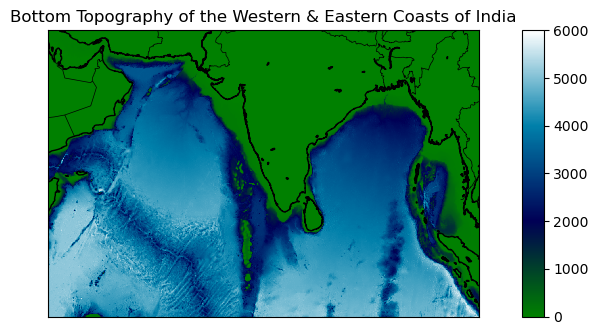

In [14]:
lats = data.variables['LAT1022_1982'][:]
lons = data.variables['LON901_2401'][:]
topo = data.variables['TOPO2'][:]

mp = Basemap(projection = 'merc', 
             llcrnrlon =  50,
             llcrnrlat =   -4,
             urcrnrlon =  100,
             urcrnrlat =  28, 
             resolution = 'i')

lon, lat = np.meshgrid(lons, lats)
x,y = mp(lon, lat)
    

c_scheme = mp.pcolor(x, y, np.squeeze(topo[0,:,:]), cmap = 'ocean')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme, location = 'right', pad = '10%')
plt.title('Bottom Topography of the Western & Eastern Coasts of India')
plt.clim(0, 6000)
plt.savefig(r'C:\Users\pavan\Downloads\OCEAN\netCDF\TOPO2.'+'jpg')
#plt.clf()
plt.show()